In [1]:
import numpy as np       #for numerical operations
import pandas as pd      #for handling data in DataFrames
import matplotlib.pyplot as plt       #for creating plots

In [2]:
#Get the training data

dfx = pd.read_csv('./data/linearX.csv')     #reading files
dfy = pd.read_csv('./data/linearY.csv')

dfx = dfx.values   #converting to NumPy
dfy = dfy.values

x = dfx.reshape((-1,))  #reshaping to 1D arrays
y = dfy.reshape((-1,))
print(x.shape,y.shape)

(99,) (99,)


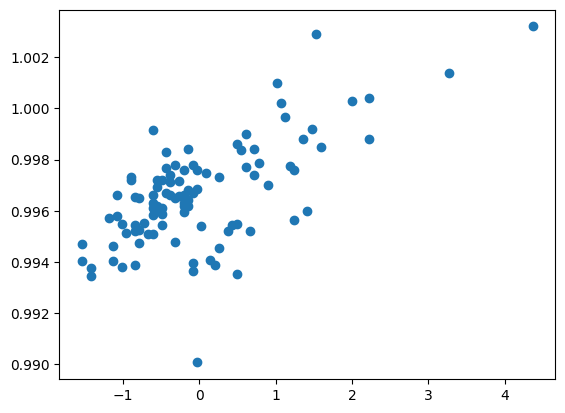

In [3]:
# shifting towards origin
X = (x-x.mean())/x.std()   # mean for shifting towards 0 and standard deviation for spreading data
Y = y
plt.scatter(X,Y)
plt.show()

In [4]:
def hypothesis(x,theta):
    return theta[0] + theta[1]*x
# theta[0] = intercept(c) , theta[1] = slope(m) [y=mx+c]


def error(X,Y,theta):     #This function calculates the squared error between the predicted values (hypothesis) and the actual target values. 
    
    m = X.shape[0]
    error = 0
    
    for i in range(m):
        hx = hypothesis(X[i],theta)
        error += (hx-Y[i])**2
        
    return error
# error = ( sum(h(x)-y)^2 )/ (2m)

def gradient(X,Y,theta):     #This function calculates the gradient of the error with respect to the parameters (intercept and slope) using the defined hypothesis.
    
    grad = np.zeros((2,))
    m = X.shape[0]

    for i in range(m):
        hx = hypothesis(X[i],theta)
        grad[0] +=  (hx-Y[i])
        grad[1] += (hx-Y[i])*X[i]
        
    return grad
    
#Algorithm
def gradientDescent(X,Y,learning_rate=0.001):
    
    theta = np.array([-2.0,0.0])
    
    itr = 0
    max_itr = 100
    
    error_list = []
    theta_list = []
    
    while(itr<=max_itr):
        grad = gradient(X,Y,theta)
        e = error(X,Y,theta)
        error_list.append(e)
        
        theta_list.append((theta[0],theta[1]))
        theta[0] = theta[0] - learning_rate*grad[0]
        theta[1] = theta[1] - learning_rate*grad[1]
        
        
        itr += 1
        
    
    return theta,error_list,theta_list
#Q = q-(alpha/m)sum(h(x^i)-(y^i))

In [5]:
final_theta, error_list,theta_list = gradientDescent(X,Y)

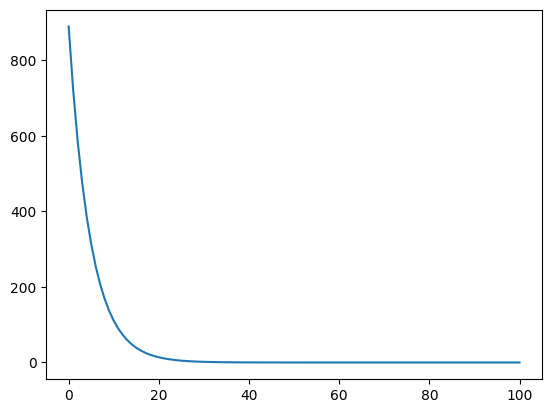

In [6]:
plt.plot(error_list)
plt.show()

In [7]:
print(final_theta)

[0.996554  0.0013579]


In [8]:
### Plot the line for testing data

xtest = np.linspace(-2,6,10)     #Generating a set of test data points ranging from -2 to 6 using np.linspace(), which divides the interval into 10 equally spaced points.
print(xtest)

[-2.         -1.11111111 -0.22222222  0.66666667  1.55555556  2.44444444
  3.33333333  4.22222222  5.11111111  6.        ]


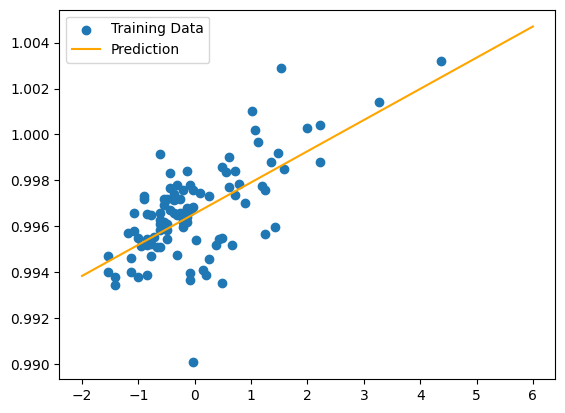

In [9]:
plt.scatter(X,Y,label='Training Data')
plt.plot(xtest,hypothesis(xtest,final_theta),color='orange',label="Prediction")
plt.legend()
plt.show()

In [10]:
#This code essentially implements a simple linear regression model using gradient descent to optimize the parameters, then visualizes the training data, prediction line, and error convergence.